## Limpieza de datos

In [6]:
import pandas as pd
import pickle

text_data = pd.read_csv('../SpanishDataSets/m3x/train_aggressiveness.csv')
text_data = text_data[['Category','Text']]

test_data = pd.read_csv('../SpanishDataSets/m3x/test_aggressiveness.csv')
test_data = test_data[['Text']]

In [13]:
import re 
import string

#Codigo unicode para emojis, puede ser utilizado con regex
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
    )

def clean_text(text):
    #Remove @USER
    text = re.sub(r'@[^\s]+','',text)
    #Remove hastags
    text = re.sub('#\w+','',text)
    #Remove emoji
    text = re.sub(EMOJI_PATTERN,'',text)
    #Remove white space
    text = re.sub('\s+',' ',text)
    #Beginning of the text white space
    text = re.sub('^\s+',' ',text)
    #Remove URL
    text = re.sub('URL','',text)
    #Remove punctuation marks
    text = re.sub('[.,\/#!¿$|%"—\?@\^&\*\+;:{}=\-_`~()]','',text)
    #Remove digits
    text = re.sub('\d','',text)
    #Lowercase
    text = text.lower()
    
    return text

#Funcion lambda para aplicar en los conjuntos de datos
clean = lambda x: clean_text(x)

In [15]:
text_data.Text = text_data.Text.apply(clean)
test_data.Text = test_data.Text.apply(clean)

,Category,Text
0,0,soy el clint eastwood de los puentes de madiso...
1,0,actualmente ya pasó de moda la pucha joto ahor...
2,0,es cierto esto y no me refiero a lo que dijo n...
3,0,vuela pega y esquiva la neta está de la vergaa...
4,0,mejor puto disfraz de la noche por tercer año ...
...,...,...
7327,0,firmado por toda la pandilla de a toda madre e...
7328,0,looool esta foto nunca me la imagine que putos...
7329,1,pinshe profe se mamo con el examen todavía que...
7330,0,ra parte con el morrito de ayer me chupa la ve...


In [16]:
text_data.to_csv('text_data_clean.csv')
test_data.to_csv('test_data_clean.csv')

## Entrenamiento de la red neuronal

In [19]:
# Importando librerias
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, GlobalMaxPool1D, Dropout, Flatten, Bidirectional, LSTM
from keras.models import Sequential

In [49]:
num_words=(2000)
max_len=200
tokenizer=Tokenizer(2000)
tokenizer.fit_on_texts(text_data.Text)
train_sequences=tokenizer.texts_to_sequences(text_data.Text)
test_sequences=tokenizer.texts_to_sequences(test_data.Text)

padded_train = pad_sequences(train_sequences, maxlen=max_len)
padded_test = pad_sequences(test_sequences, maxlen=max_len)

In [24]:
y = text_data.Category.values

In [30]:
batch_size = 28
epoch = 6
model=Sequential([Embedding(num_words,32,input_length=max_len),
                 Bidirectional(LSTM(64,return_sequences=True)),
                 GlobalMaxPool1D(),
                 Dense(60,activation='relu'),
                  Dense(1,activation='sigmoid')
                 ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
history = model.fit(padded_train,y,batch_size,epochs=epoch, validation_split=.25, steps_per_epoch=150)

Epoch 1/6
150/150 [==============================] - 13s 89ms/step - loss: 0.6035 - accuracy: 0.7090 - val_loss: 0.5049 - val_accuracy: 0.7927
Epoch 2/6
150/150 [==============================] - 13s 87ms/step - loss: 0.4673 - accuracy: 0.7999 - val_loss: 0.4799 - val_accuracy: 0.8031
Epoch 3/6
150/150 [==============================] - 13s 87ms/step - loss: 0.3636 - accuracy: 0.8437 - val_loss: 0.3651 - val_accuracy: 0.8385
Epoch 4/6
150/150 [==============================] - 13s 87ms/step - loss: 0.3074 - accuracy: 0.8704 - val_loss: 0.3763 - val_accuracy: 0.8445
Epoch 5/6
150/150 [==============================] - 13s 87ms/step - loss: 0.2497 - accuracy: 0.8955 - val_loss: 0.4063 - val_accuracy: 0.8287
Epoch 6/6
150/150 [==============================] - 13s 87ms/step - loss: 0.2158 - accuracy: 0.9144 - val_loss: 0.4567 - val_accuracy: 0.8287


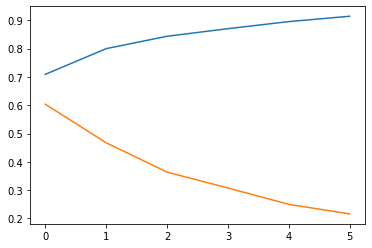

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label="Precisión")
plt.plot(history.history['loss'], label="Perdida")

In [50]:
predicted = model.predict(padded_test)

In [52]:
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:2f}'.format})

for i in range(20):
    print(test_data.Text[i],predicted[i])

 si y uno que era como de sopa de letras o un pedo así de la madre esa que está en la explanada bien memes de secundaria  [0.011068]
verga creo que van a matar a algunos periodistas por hacer esto  [0.018898]
 que nivel de bancada está preparado el movimiento morenazi con el noroñas y la delfinita hasta vamos a extrañar al señor hdp de bartlett  [0.978384]
a san martín tirilín tirilín se lo llevó torolón torolón un huracán taralán taralán questá cabrón torolón torolón  [0.036261]
buenas putas noches pinches rameros de mierda aberraciones de dios putos bastardos  [0.908102]
 por q es una mamá luchona que cuida a su bendición  [0.020743]
 que nuestro señor jesus lo cuide y proteja y nuestra madre maria lo guíe y lo mantenga bajo su manto sagrado su santidad buen vieje  [0.003701]
siempre le doy una nueva oportunidad al amor xq no quiero estar frustrada y convertirme en una luchona o feminazi  [0.001958]
porq no dises q televisa pone presidentes vende putas para los mas ricos de pais q tu

In [53]:
#Saving the model
from keras.models import load_model

model.save('Mexicanspanish_OLD_model.h5')

In [21]:
import pandas as pd
from keras.models import load_model
# Importando librerias
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, GlobalMaxPool1D, Dropout, Flatten, Bidirectional, LSTM
from keras.models import Sequential

new_model = load_model('Mexicanspanish_OLD_model.h5')
test2 = pd.read_csv('myMexicanTest.csv')
test2 = test2.Text.astype(str)
num_words2=(2000)
max_len2=200
tokenizer2=Tokenizer(2000)
tokenizer2.fit_on_texts(text_data.Text)
train_sequences2=tokenizer2.texts_to_sequences(text_data.Text)
test_sequences2=tokenizer2.texts_to_sequences(test2)
padded_test2 = pad_sequences(test_sequences2, maxlen=max_len2)

new_model.predict(padded_test2)


array([[0.8922128]], dtype=float32)